In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pickle
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
l = [["JE", "Jane Eyre","Charlotte Brontë"],
     ["EM", "Emma","Jane Austen"],
     ["GE", "Great Expectations", "Charles Dickens"],
     ["MD", "Mrs Dalloway in Bond Street", "Virginia Woolf"],
     ["LW", "Little Women", "Louisa May Alcott"],
     ["LO", "Lolita", "Vladimir Nabokov"],
     ["VI", "Villette", "Charlotte Brontë"],
     ["PP", "Pride and Prejudice", "Jane Austen"],
     ["GG", "The Great Gatsby", "F. Scott Fitzgerald"],
     ["TM", "The Three Musketeers", "Alexandre Dumas"]]
novel_df = pd.DataFrame(l, columns = ["abbr","novel","author"])
novel_df.set_index('abbr',inplace=True, drop=True)

## GPT result

In [ ]:
with open('/content/drive/MyDrive/1012_Project/gpt_gender_result.pickle', 'rb') as handle:
  gpt_gender = pickle.load(handle)

## Manual Result

In [ ]:
with open('/content/drive/MyDrive/1012_Project/manual_gender_result.pickle', 'rb') as handle:
  manual_gender = pickle.load(handle)

## Evaluation

In [ ]:
def gender_evaluate(abbr):
  '''
  abbr: string, abbr for the novel, such as "JE" for 'Jane Eyre'
  ---
  return:  acc: number, the accuracy of gender detection
           wrong_df: pd.Dataframe, wrong-labeled names with manual label and gpt label
           cm: np.ndarry, confusion matrix of size 3*4
  '''
  print(novel_df.loc[abbr]["novel"]+":")

  df = gpt_gender[abbr].merge(manual_gender[abbr], on= "Name Entity")
  ## precison for female
  f1 = df[df["GPT Label"] == "Female"]
  f2 = f1[f1["Manual Label"] == "Female"]
  print("    Female_precision: {:.4f}".format(f2.shape[0]/ f1.shape[0]))
  m1 = df[df["GPT Label"] == "Male"]
  m2 = m1[m1["Manual Label"] == "Male"]
  print("    Male_precision: {:.4f}".format(m2.shape[0]/ m1.shape[0]))

  ## Overall Accuracy
  dd1 = df[df["Manual Label"] == df["GPT Label"]]
  dd2 = df[(df["Manual Label"]=="Both") & (df["GPT Label"] == "Neither")]
  right_df = pd.concat([dd1,dd2])
  acc = right_df.shape[0] / df.shape[0]
  print("    Overall_acc: {:.4f}".format(acc))

  # plot confusion matrix
  label1 = ["Female","Male","Neither"]
  label2 = ["Female","Male","Neither","Both"]
  cm = np.zeros((len(label1), len(label2)),dtype = int)
  # Iterate over the DataFrame and populate the confusion matrix
  for idx, row in df.iterrows():
      j = label2.index(row["Manual Label"])
      i = label1.index(row["GPT Label"])
      cm[i, j] += 1
  confusion_plot(cm)
  return acc, cm

In [ ]:
def confusion_plot(cm):
  label1 = ["Female","Male","Neither"]
  label2 = ["Female","Male","Neither","Both"]
  # Create confusion matrix plot
  fig, ax = plt.subplots()
  im = ax.imshow(cm, cmap='viridis')

  # Set tick labels and axis labels
  ax.set_xticks(np.arange(len(label2)))
  ax.set_yticks(np.arange(len(label1)))
  ax.set_xticklabels(label2)
  ax.set_yticklabels(label1)

  # Loop over data dimensions and create text annotations
  for i in range(len(label1)):
      for j in range(len(label2)):
          text = ax.text(j, i, cm[i, j],
                        ha="center", va="center", color="w")

  # Create colorbar
  cbar = ax.figure.colorbar(im, ax=ax)

  # Set plot title and display the plot
  plt.title("Confusion Matrix")
  plt.show()

Jane Eyre:
    Female_precision: 0.9000
    Male_precision: 0.5806
    Overall_acc: 0.7582


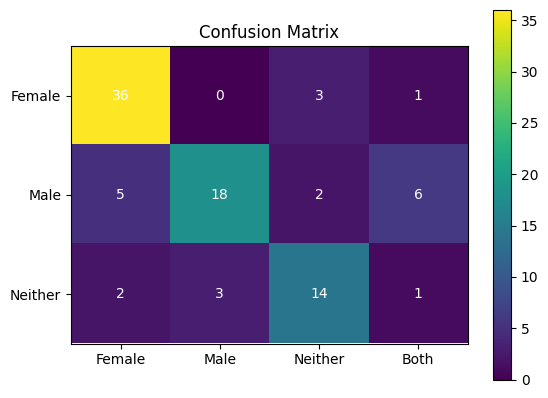

Emma:
    Female_precision: 0.8276
    Male_precision: 0.3571
    Overall_acc: 0.5833


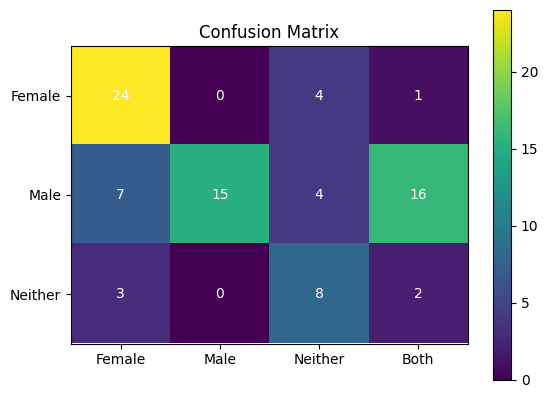

Great Expectations:
    Female_precision: 0.9167
    Male_precision: 0.7321
    Overall_acc: 0.7654


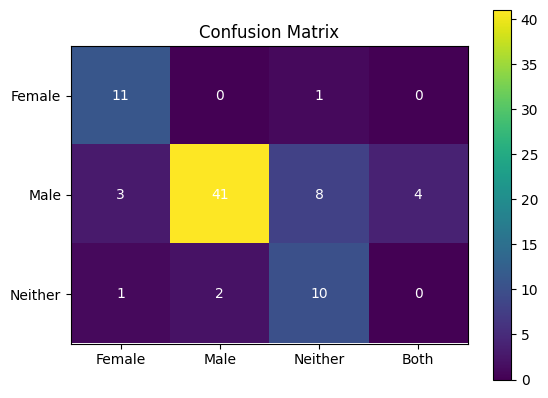

Mrs Dalloway in Bond Street:
    Female_precision: 1.0000
    Male_precision: 1.0000
    Overall_acc: 0.8750


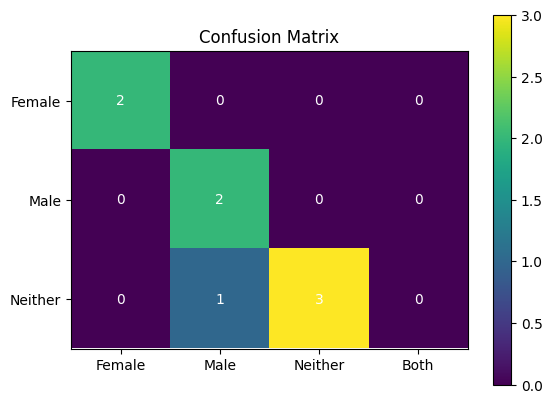

Little Women:
    Female_precision: 0.8947
    Male_precision: 0.7027
    Overall_acc: 0.6893


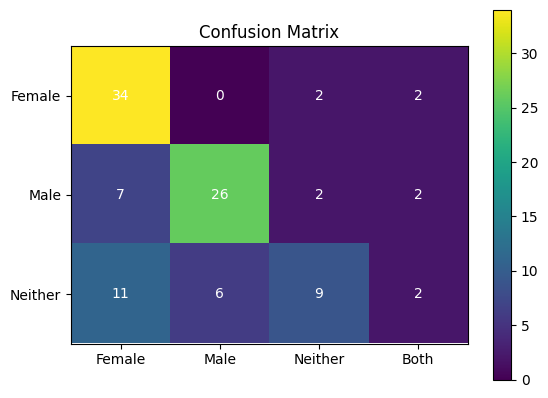

Lolita:
    Female_precision: 1.0000
    Male_precision: 0.5161
    Overall_acc: 0.6515


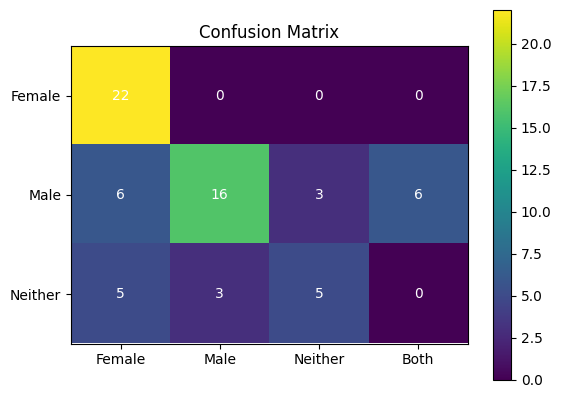

Villette:
    Female_precision: 0.6667
    Male_precision: 0.6897
    Overall_acc: 0.6782


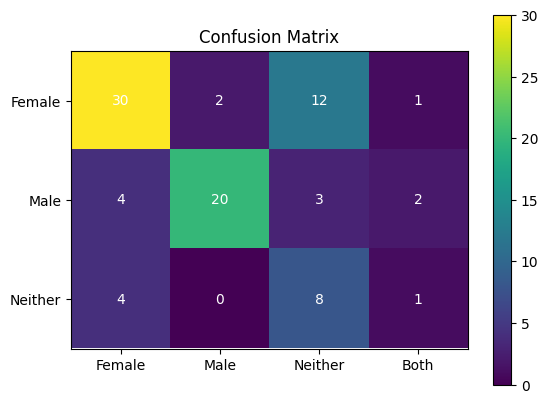

Pride and Prejudice:
    Female_precision: 0.9375
    Male_precision: 0.3333
    Overall_acc: 0.6892


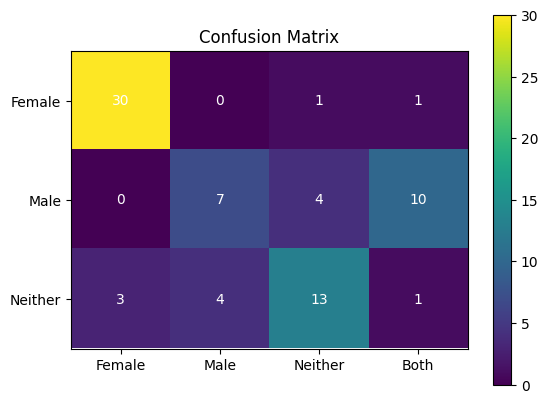

The Great Gatsby:
    Female_precision: 1.0000
    Male_precision: 0.7727
    Overall_acc: 0.7838


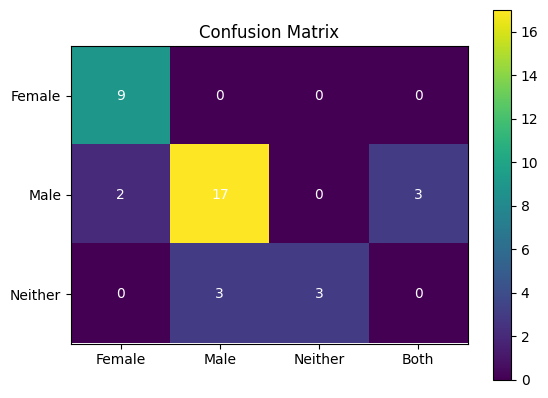

The Three Musketeers:
    Female_precision: 0.8889
    Male_precision: 0.6974
    Overall_acc: 0.7071


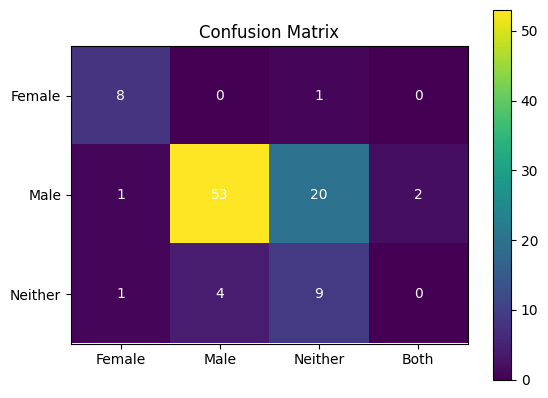

In [ ]:
ACC = []
CM = []
for abbr in list(novel_df.index):
  acc,cm = gender_evaluate(abbr)
  ACC.append(acc)
  CM.append(cm)

In [ ]:
ACC= np.array(ACC)
print(np.mean(ACC))
print(np.std(ACC))

0.71810473297891
0.07665515672647367


Overall:
    Female_precision:0.8655
    Male_precision:0.6196
    Overall_acc:0.6986


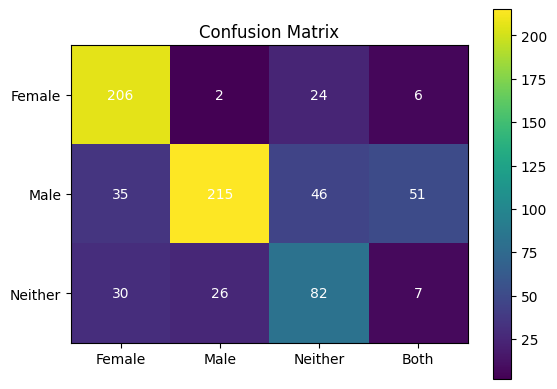

In [ ]:
cm_total = np.zeros((3,4),dtype = int)
for i in range(10):
  cm_total += CM[i]

print("Overall:")
print("    Female_precision:{:.4f}".format(cm_total[0,0]/np.sum(cm_total[0,:])))
print("    Male_precision:{:.4f}".format(cm_total[1,1]/np.sum(cm_total[1,:])))
print("    Overall_acc:{:.4f}".format((cm_total[0,0]+cm_total[1,1]+cm_total[2,2]+cm_total[2,3])/np.sum(cm_total)))
confusion_plot(cm_total)